In [21]:
from qutip import (sigmax, sigmay, tensor, basis, Qobj)
from qutip.metrics import fidelity
from qutip_qip.circuit import QubitCircuit
from qutip_qip.compiler import GateCompiler, Instruction
from qutip_qip.device import ModelProcessor
from qutip.qip.noise import ControlAmpNoise
from qutip.qip.operations.gates import *

import numpy as np
import functools # for reduce
from scipy.signal import argrelextrema 
# Import function to generate a gate set and add inverse gates 
from inverse_search import gates_set_generator, matrix_list, add_inverse_gates
from NTU_sim import NTU_processor, NTU_simulation, NTU_compiler

In [22]:
import matplotlib.pyplot as plt

In [23]:
VStd = 0.1
phaseStd = 0.382 / 180 * np.pi

detuningStd = 52769
samplingRate = 5898.24e6 # 5.89824 GS/s
omega = 10e6 # 20MHz

VNaught = 1
hbar = 1
phiNaught = 0
aNaught = 25 / 46

V = VNaught + np.random.normal(scale=VStd)
phi = phiNaught + np.random.normal(scale=phaseStd)
I = np.cos(phi)
Q = np.sin(phi)

# Decoherence time
T1 = 8.66e-6
T1_err = 0.49
T2 = 9.08e-6
T2_err = 0.74e-6
T2_echo = 16.14e-6
T2_echo_err = 3.21e-6

In [24]:
4.7789115646258497e-08

4.7789115646258497e-08

In [25]:
param_dict ={"VNaught": VNaught, "VStd": VStd, "phaseStd":phaseStd,
            "omega": omega, "aNaught": aNaught, "detuningStd": detuningStd,
            "FPGA_noise_strength": np.pi * VNaught * omega}

In [26]:
num_qubits = 1
num_gates_list = np.arange(5,105,20)
num_samples = 5

In [27]:
baseline = NTU_simulation(NTU_processor, NTU_compiler, 1, param_dict, add_FPGA_noise = False, t1 = None, t2 = None)
t1t2 = NTU_simulation(NTU_processor, NTU_compiler, 1, param_dict, add_FPGA_noise = False, t1 = T1, t2 = T2)
FPGA = NTU_simulation(NTU_processor, NTU_compiler, 1, param_dict, add_FPGA_noise = True, t1 = None, t2 = None)
FPGA_t1t2 = NTU_simulation(NTU_processor, NTU_compiler, 1, param_dict, add_FPGA_noise = True, t1 = T1, t2 = T2)

Gate set unchanged
Gate set unchanged
Gate set unchanged
Gate set unchanged


Gate set unchanged


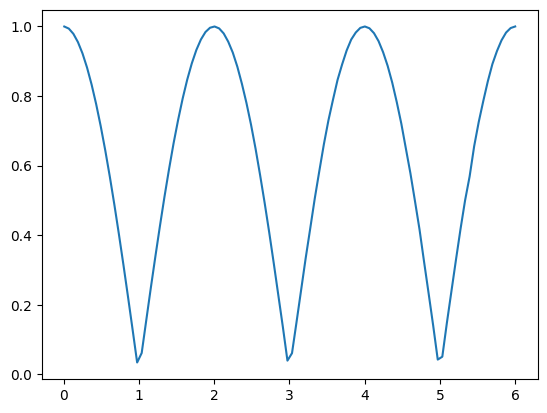

In [28]:
x=baseline.find_gates_set(plot_fidelity = True)

In [29]:
fidelity_baseline, error_baseline = baseline.test_run(num_samples, num_gates_list)
fidelity_t1t2, error_t1t2 = t1t2.test_run(num_samples, num_gates_list)
fidelity_FPGA, error_FPGA = FPGA.test_run(num_samples, num_gates_list)
fidelity_FPGA_t1t2, error_FPGA_t1t2 = FPGA_t1t2.test_run(num_samples, num_gates_list)

Text(0, 0.5, 'Ground State Fidelity')

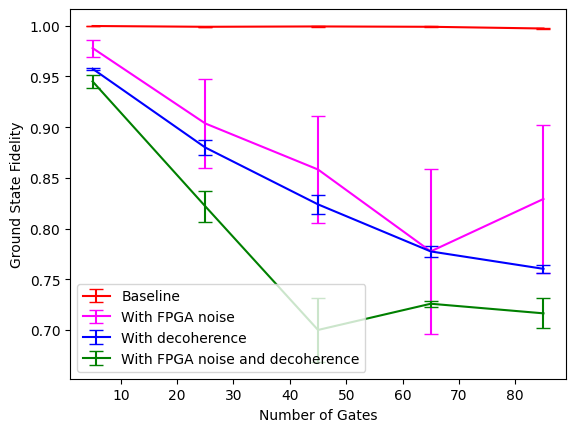

In [30]:
plt.autoscale(enable=True, axis="y", tight=False)
plt.errorbar(num_gates_list, fidelity_baseline, yerr=error_baseline, 
             color='red', capsize=5,label = 'Baseline')
plt.errorbar(num_gates_list, fidelity_FPGA, yerr=error_FPGA, 
             color='magenta', capsize=5, label = 'With FPGA noise')
plt.errorbar(num_gates_list, fidelity_t1t2, yerr=error_t1t2, 
             color='blue', capsize=5, label = 'With decoherence')
plt.errorbar(num_gates_list, fidelity_FPGA_t1t2, yerr=error_FPGA_t1t2, 
             color='green', capsize=5, label = 'With FPGA noise and decoherence')
plt.legend()
plt.xlabel("Number of Gates")
plt.ylabel("Ground State Fidelity")